## Importing Library

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

C:\Users\Mayur Maheshwari\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Reading Data

In [2]:
payhistory=pd.read_sas("1 - Data for Churn Modeling/payhistory.sas7bdat")
payhistory.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,b'0000019',b'X',b'CO'
1,39.0,1993-12-31,41.32,b'0000020',b'X',b'CO'
2,40.0,1993-12-31,13.10,b'0000020',b'X',b'CO'
3,54091.0,1994-01-01,2.02,b'0000020',b'X',b'CO'
4,104480.0,1994-05-19,0.50,b'0000020',b'D',b'OK'


In [4]:
payhistory.iloc[:,3]=payhistory.iloc[:,3].str.decode("utf-8")

In [5]:
payhistory.iloc[:,4]=payhistory.iloc[:,4].str.decode("utf-8")
payhistory.iloc[:,5]=payhistory.iloc[:,5].str.decode("utf-8")

In [6]:
payhistory.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,0000019,X,CO
1,39.0,1993-12-31,41.32,0000020,X,CO
2,40.0,1993-12-31,13.10,0000020,X,CO
3,54091.0,1994-01-01,2.02,0000020,X,CO
4,104480.0,1994-05-19,0.50,0000020,D,OK


In [7]:
payhistory.dtypes

PID                 float64
PDATE        datetime64[ns]
PAMT                float64
EXTRELNO             object
PAYTYPECD            object
STATUS               object
dtype: object

In [8]:
comclas=pd.read_sas("1 - Data for Churn Modeling/comclas.sas7bdat")
comclas.head()

,CLASCODE,CLASDESC
0,b'CT',b'CTS-item'
1,b'RI',b'Request for information'
2,b'CM',b'Complaint'
3,b'TA',b'Threath / Accusation'
4,b'AK',b'Acknowledgement'


In [9]:
for col in comclas.columns:
    comclas[col]=comclas[col].str.decode("utf-8")

In [10]:
comclas.head()

,CLASCODE,CLASDESC
0,CT,CTS-item
1,RI,Request for information
2,CM,Complaint
3,TA,Threath / Accusation
4,AK,Acknowledgement


In [11]:
comclas['CLASDESC'].value_counts()

Threath / Accusation       1
Answer                     1
Request for information    1
Acknowledgement            1
Reminder                   1
Complaint                  1
CTS-item                   1
Information delivery       1
Name: CLASDESC, dtype: int64

In [12]:
comclas.dtypes

CLASCODE    object
CLASDESC    object
dtype: object

In [13]:
commaint=pd.read_sas("1 - Data for Churn Modeling/commaint.sas7bdat")
commaint.head()

,MNTOPCODE,MNTOPDESC
0,b'CAN',b'Cancellations/replacements'
1,b'DIS',b'Discontinuations'
2,b'MKT',b'Marketing - Enquiries'
3,b'GEN',b'General'
4,b'NEW',b'New relations'


In [14]:
for col in commaint.columns:
    commaint[col]=commaint[col].str.decode("utf-8")

In [15]:
commaint.head()

,MNTOPCODE,MNTOPDESC
0,CAN,Cancellations/replacements
1,DIS,Discontinuations
2,MKT,Marketing - Enquiries
3,GEN,General
4,NEW,New relations


In [16]:
commaint['MNTOPDESC'].value_counts()

General                            2
Projects                           1
Arrears                            1
Public Relations activities        1
Visits                             1
Communication Tracking System      1
Finance                            1
Action                             1
Reports                            1
Volunteers                         1
Catastrophes                       1
TV-Show                            1
Marketing - Enquiries              1
Translation                        1
information about Plan             1
Web related Actions: E-commerce    1
Enrollment                         1
New relations                      1
Information about FF/FC            1
Fiscal certificates                1
Contacts for sponsoring            1
Discontinuations                   1
Correspondence FP/FC               1
Merchandising                      1
Special Forms                      1
Mail met FC, klachten en info      1
Change in information Relation     1
T

In [17]:
commediu=pd.read_sas("1 - Data for Churn Modeling/commediu.sas7bdat")
commediu.head()

,MEDIUMCODE,MEDIUMDESC
0,b'FF',b'Face to Face contact'
1,b'FX',b'Fax'
2,b'TX',b'Telex'
3,b'EM',b'Electronic Mail'
4,b'TE',b'Telephone call'


In [18]:
for col in commediu.columns:
    commediu[col]=commediu[col].str.decode("utf-8")

In [19]:
commediu.head()

,MEDIUMCODE,MEDIUMDESC
0,FF,Face to Face contact
1,FX,Fax
2,TX,Telex
3,EM,Electronic Mail
4,TE,Telephone call


In [20]:
communication=pd.read_sas("1 - Data for Churn Modeling/communication.sas7bdat")
communication.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,b'000405402',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-05-09
1,b'000430904',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-06-14
2,b'000592732',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-10-21
3,b'000593375',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-10-21
4,b'000618514',b'CI',b'CTS',b'CT',b'0000020',b'O',1994-11-28


In [21]:
for col in communication.columns:
    if col != 'CONTDATE':
        communication[col]=communication[col].str.decode("utf-8")

In [22]:
communication.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,000405402,CI,CTS,CT,0000020,O,1994-05-09
1,000430904,CI,CTS,CT,0000020,O,1994-06-14
2,000592732,CI,CTS,CT,0000020,O,1994-10-21
3,000593375,CI,CTS,CT,0000020,O,1994-10-21
4,000618514,CI,CTS,CT,0000020,O,1994-11-28


In [23]:
extrel=pd.read_sas("1 - Data for Churn Modeling/extrel.sas7bdat")
extrel.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,b'0026414',b'CT',1995-02-02,NaT
1,b'0026419',b'FP',1992-03-01,NaT
2,b'0026424',b'FP',1992-03-01,1996-12-24
3,b'0026430',b'FP',1992-03-01,2006-01-31
4,b'0026430',b'CT',1997-03-07,NaT


In [24]:
extrel['EXTRELNO']=extrel.iloc[:,0].str.decode("utf-8")
extrel['EXRELACTCD']=extrel.iloc[:,1].str.decode("utf-8")

In [25]:
extrel.head()


,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,0026414,CT,1995-02-02,NaT
1,0026419,FP,1992-03-01,NaT
2,0026424,FP,1992-03-01,1996-12-24
3,0026430,FP,1992-03-01,2006-01-31
4,0026430,CT,1997-03-07,NaT


In [26]:
extrel.dtypes

EXTRELNO              object
EXRELACTCD            object
EXTRELSTDT    datetime64[ns]
EXRELDATEN    datetime64[ns]
dtype: object

In [27]:
extrelty=pd.read_sas("1 - Data for Churn Modeling/extrelty.sas7bdat")
extrelty.head()

,EXRELACTCD,EXRELACTDE
0,b'FP',b'CommitmentDo'
1,b'PS',b'Prospect'
2,b'PF',b'Prosp Fundra'
3,b'PP',b'Prosp Promot'
4,b'GR',b'Grantor'


In [28]:
for col in extrelty.columns:
    extrelty[col]=extrelty[col].str.decode("utf-8")

In [29]:
extrelty.head()

,EXRELACTCD,EXRELACTDE
0,FP,CommitmentDo
1,PS,Prospect
2,PF,Prosp Fundra
3,PP,Prosp Promot
4,GR,Grantor


In [30]:
naeaddr=pd.read_sas("1 - Data for Churn Modeling/nameaddr.sas7bdat")
naeaddr.head()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,b'0000019',b'HR',b'2500',b'NL'
1,b'0000020',b'HR',b'9550',b'NL'
2,b'0000035',b'HM',b'2150',b'NL'
3,b'0000042',b'FA',b'3012',b'NL'
4,b'0000043',b'MW',b'3000',b'NL'


In [31]:
naeaddr['NAME1TITLE']=naeaddr.iloc[:,1].str.decode("utf-8")

In [32]:
naeaddr['EXTRELNO']=naeaddr.iloc[:,0].str.decode("utf-8")
naeaddr['POSTCODE']=naeaddr.iloc[:,2].str.decode("utf-8")
naeaddr['LANGUACODE']=naeaddr.iloc[:,3].str.decode("utf-8")

In [33]:
naeaddr.dtypes

EXTRELNO      object
NAME1TITLE    object
POSTCODE      object
LANGUACODE    object
dtype: object

In [34]:
naeaddr.head()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,0000019,HR,2500,NL
1,0000020,HR,9550,NL
2,0000035,HM,2150,NL
3,0000042,FA,3012,NL
4,0000043,MW,3000,NL


In [35]:
payhistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205720 entries, 0 to 1205719
Data columns (total 6 columns):
PID          1205720 non-null float64
PDATE        1205720 non-null datetime64[ns]
PAMT         1205720 non-null float64
EXTRELNO     1205720 non-null object
PAYTYPECD    1187546 non-null object
STATUS       1205719 non-null object
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 55.2+ MB


In [36]:
payhistory.describe()

,PID,PAMT
count,1.205720e+06,1.205720e+06
mean,2.655267e+06,2.579925e+01
std,1.480799e+06,3.725114e+01
min,3.800000e+01,-2.436960e+03
25%,1.377468e+06,2.033000e+01
50%,2.709602e+06,2.033000e+01
75%,3.946880e+06,2.300000e+01
max,5.101978e+06,2.436960e+03


In [37]:
comclas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
CLASCODE    8 non-null object
CLASDESC    8 non-null object
dtypes: object(2)
memory usage: 208.0+ bytes


In [38]:
comclas.describe()

,CLASCODE,CLASDESC
count,8,8
unique,8,8
top,RM,Threath / Accusation
freq,1,1


In [39]:
comclas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
CLASCODE    8 non-null object
CLASDESC    8 non-null object
dtypes: object(2)
memory usage: 208.0+ bytes


In [40]:
comclas.describe()

,CLASCODE,CLASDESC
count,8,8
unique,8,8
top,RM,Threath / Accusation
freq,1,1


In [41]:
commaint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
MNTOPCODE    30 non-null object
MNTOPDESC    30 non-null object
dtypes: object(2)
memory usage: 560.0+ bytes


In [42]:
commaint.describe()

,MNTOPCODE,MNTOPDESC
count,30,30
unique,30,29
top,CAT,General
freq,1,2


In [43]:
commediu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
MEDIUMCODE    16 non-null object
MEDIUMDESC    16 non-null object
dtypes: object(2)
memory usage: 336.0+ bytes


In [44]:
commediu.describe()

,MEDIUMCODE,MEDIUMDESC
count,16,16
unique,16,16
top,AC,Change of address card
freq,1,1


In [45]:
commediu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
MEDIUMCODE    16 non-null object
MEDIUMDESC    16 non-null object
dtypes: object(2)
memory usage: 336.0+ bytes


In [46]:
communication.describe()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
count,763569,763569,763569,763569,763569,763569,763569
unique,763328,15,24,9,21932,2,3290
top,005060141,CI,CTS,CT,0181194,O,2001-11-20 00:00:00
freq,2,446595,453839,459032,1008,733423,10760
first,NaN,NaN,NaN,NaN,NaN,NaN,1993-11-02 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-25 00:00:00


In [48]:
extrelty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
EXRELACTCD    26 non-null object
EXRELACTDE    26 non-null object
dtypes: object(2)
memory usage: 496.0+ bytes


In [49]:
extrelty.describe()

,EXRELACTCD,EXRELACTDE
count,26,26
unique,26,26
top,OI,Mag Reader
freq,1,1


In [50]:
communication.columns


Index(['CONTID', 'MEDIUMCODE', 'MNTOPCODE', 'CLASCODE', 'EXTRELNO',
       'CONTDIREC', 'CONTDATE'],
      dtype='object')

In [51]:
len(communication)

763569

# Splitting data into timewindow defined.


In [52]:
payhistory.sort_values('PDATE',inplace=True)

In [53]:
communication.sort_values('CONTDATE',inplace=True)

In [54]:
extrel.sort_values('EXRELDATEN',inplace=True)

In [55]:
new_data=payhistory[payhistory.PDATE<=pd.Timestamp(2005,12,3)]

In [56]:
new_data4=communication[communication.CONTDATE<=pd.Timestamp(2005,12,3)]

In [57]:
new_data5=extrel[extrel.EXRELDATEN<=pd.Timestamp(2005,12,3)]

In [58]:
donors=(new_data4['EXTRELNO'].unique())

In [59]:
ind_data=(new_data4['EXTRELNO'].value_counts()).to_frame()

In [60]:
ind_data.index.names = ['EXTRELNO']
ind_data.rename(index={None:'EXTRELNO'},columns={'EXTRELNO':'Frequency'},inplace=True)

In [61]:
new_data4['recency']=pd.Timestamp(2005,12,3)-new_data4['CONTDATE']

C:\Users\Mayur Maheshwari\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
ind_data['recency']=new_data4.groupby('EXTRELNO').recency.min()

In [63]:
ind_data.head()

,Frequency,recency
EXTRELNO,,
0181194,760,11 days
0001773,545,10 days
0025455,476,10 days
0035750,435,12 days
0035231,373,40 days


In [64]:
ind_data['sum']=new_data.groupby('EXTRELNO').PAMT.sum()

In [65]:
ind_data.head()

,Frequency,recency,sum
EXTRELNO,,,
0181194,760,11 days,7412.56
0001773,545,10 days,52168.79
0025455,476,10 days,28243.57
0035750,435,12 days,14648.45
0035231,373,40 days,27620.49


In [66]:
ind_data['avg']=new_data.groupby('EXTRELNO').PAMT.mean()

In [67]:
ind_data.head()

,Frequency,recency,sum,avg
EXTRELNO,,,,
0181194,760,11 days,7412.56,23.020373
0001773,545,10 days,52168.79,20.259724
0025455,476,10 days,28243.57,110.759098
0035750,435,12 days,14648.45,57.899012
0035231,373,40 days,27620.49,20.160942


In [68]:
temp=new_data
temp.index=new_data.EXTRELNO
temp1=temp['PAYTYPECD'].to_frame()

In [69]:
temp2=pd.DataFrame()

In [70]:
curr_val=pd.get_dummies(temp1['PAYTYPECD'],prefix='PAYTYPECD')

In [71]:
curr_val.loc['0000020'].sum()

PAYTYPECD_D    139
PAYTYPECD_E      0
PAYTYPECD_O      0
PAYTYPECD_X      3
dtype: int64

In [72]:
pay_type=curr_val.groupby('EXTRELNO').sum()

In [73]:
len(pay_type)

15900

In [74]:
ind_data=ind_data.join(pay_type)

In [77]:
naeaddr.index=naeaddr['EXTRELNO']

In [78]:
ind_data.join(naeaddr['LANGUACODE'])

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X,LANGUACODE
EXTRELNO,,,,,,,,,
0181194,760,11 days,7412.56,23.020373,322.0,0.0,0.0,0.0,NL
0001773,545,10 days,52168.79,20.259724,2463.0,42.0,15.0,25.0,NL
0025455,476,10 days,28243.57,110.759098,0.0,10.0,214.0,10.0,NL
0035750,435,12 days,14648.45,57.899012,232.0,10.0,0.0,4.0,NL
0035231,373,40 days,27620.49,20.160942,1332.0,0.0,0.0,28.0,NL
0000955,312,162 days,5687.19,15.005778,0.0,7.0,361.0,9.0,NL
0009970,308,54 days,2811.97,19.943050,138.0,0.0,1.0,2.0,NL
0033799,296,59 days,4157.86,50.705610,45.0,0.0,24.0,4.0,NL
0174473,296,16 days,5606.39,14.910612,0.0,7.0,366.0,0.0,NL


In [79]:
complaint_data=new_data4[new_data4.CLASCODE=='CM']

In [80]:
complaint_data.index=complaint_data['EXTRELNO']

In [81]:
temp=ind_data
temp=temp.join(complaint_data['CLASCODE'])

In [82]:
curr_val1=pd.get_dummies(temp['CLASCODE'],prefix='CLASCODE')

In [83]:
curr_val1=curr_val1.groupby(curr_val1.index).sum()

In [84]:
ind_data=ind_data.join(curr_val1)

In [85]:
ind_data

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X,CLASCODE_CM
EXTRELNO,,,,,,,,,
0181194,760,11 days,7412.56,23.020373,322.0,0.0,0.0,0.0,0
0001773,545,10 days,52168.79,20.259724,2463.0,42.0,15.0,25.0,0
0025455,476,10 days,28243.57,110.759098,0.0,10.0,214.0,10.0,0
0035750,435,12 days,14648.45,57.899012,232.0,10.0,0.0,4.0,0
0035231,373,40 days,27620.49,20.160942,1332.0,0.0,0.0,28.0,1
0000955,312,162 days,5687.19,15.005778,0.0,7.0,361.0,9.0,0
0009970,308,54 days,2811.97,19.943050,138.0,0.0,1.0,2.0,2
0033799,296,59 days,4157.86,50.705610,45.0,0.0,24.0,4.0,0
0174473,296,16 days,5606.39,14.910612,0.0,7.0,366.0,0.0,0


In [86]:
inco_com_data=new_data4[new_data4.CONTDIREC=='I']

In [87]:
inco_com_data.index=inco_com_data['EXTRELNO']

In [88]:
temp=ind_data
temp=temp.join(inco_com_data['CONTDIREC'])
curr_val2=pd.get_dummies(temp['CONTDIREC'],prefix='CONTDIREC')

In [89]:
curr_val2.index.unique()

Index(['0000020', '0000035', '0000042', '0000043', '0000060', '0000072',
       '0000081', '0000089', '0000091', '0000100',
       ...
       '0240664', '0240678', '0240679', '0240684', '0240685', '0240689',
       '0240696', '0240698', '0240700', '0240752'],
      dtype='object', name='EXTRELNO', length=21306)

In [90]:
len(ind_data)

21306

In [91]:
ind_data.columns

Index(['Frequency', 'recency', 'sum', 'avg', 'PAYTYPECD_D', 'PAYTYPECD_E',
       'PAYTYPECD_O', 'PAYTYPECD_X', 'CLASCODE_CM'],
      dtype='object')

In [92]:
total = ind_data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((ind_data.isnull().sum(axis=0)/ind_data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
PAYTYPECD_X,6393,30.005632
PAYTYPECD_O,6393,30.005632
PAYTYPECD_E,6393,30.005632
PAYTYPECD_D,6393,30.005632
avg,6393,30.005632
sum,6393,30.005632
CLASCODE_CM,0,0.000000
recency,0,0.000000
Frequency,0,0.000000


In [93]:
ind_data.head(20)

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X,CLASCODE_CM
EXTRELNO,,,,,,,,,
0181194,760,11 days,7412.56,23.020373,322.0,0.0,0.0,0.0,0
0001773,545,10 days,52168.79,20.259724,2463.0,42.0,15.0,25.0,0
0025455,476,10 days,28243.57,110.759098,0.0,10.0,214.0,10.0,0
0035750,435,12 days,14648.45,57.899012,232.0,10.0,0.0,4.0,0
0035231,373,40 days,27620.49,20.160942,1332.0,0.0,0.0,28.0,1
0000955,312,162 days,5687.19,15.005778,0.0,7.0,361.0,9.0,0
0009970,308,54 days,2811.97,19.943050,138.0,0.0,1.0,2.0,2
0033799,296,59 days,4157.86,50.705610,45.0,0.0,24.0,4.0,0
0174473,296,16 days,5606.39,14.910612,0.0,7.0,366.0,0.0,0


In [94]:
ind_data['PAYTYPECD_X'].fillna(value=1,inplace=True)

In [95]:
total = ind_data.isnull().sum()
percent = ((total/ind_data.isnull().count())*100)
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
Frequency,0,0.000000
recency,0,0.000000
sum,6393,30.005632
avg,6393,30.005632
PAYTYPECD_D,6393,30.005632
PAYTYPECD_E,6393,30.005632
PAYTYPECD_O,6393,30.005632
PAYTYPECD_X,0,0.000000
CLASCODE_CM,0,0.000000


In [96]:
ind_data['PAYTYPECD_O'].fillna(value=0,inplace=True)
ind_data['PAYTYPECD_D'].fillna(value=0,inplace=True)
ind_data['PAYTYPECD_E'].fillna(value=0,inplace=True)

In [99]:
total = ind_data.isnull().sum()
percent = ((total/ind_data.isnull().count())*100)
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
Frequency,0,0.000000
recency,0,0.000000
sum,6393,30.005632
avg,6393,30.005632
PAYTYPECD_D,0,0.000000
PAYTYPECD_E,0,0.000000
PAYTYPECD_O,0,0.000000
PAYTYPECD_X,0,0.000000
CLASCODE_CM,0,0.000000


In [100]:
imp_mean = Imputer(missing_values = 'NaN', strategy='mean')
imp_mean.fit(ind_data[['avg']])
ind_data['avg'] = imp_mean.transform(ind_data[['avg']])

In [101]:
imp_mean = Imputer(missing_values = 'NaN', strategy='mean')
imp_mean.fit(ind_data[['sum']])
ind_data['sum'] = imp_mean.transform(ind_data[['sum']])

In [103]:
total = ind_data.isnull().sum()
percent = ((total/ind_data.isnull().count())*100)
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
Frequency,0,0.0
recency,0,0.0
sum,0,0.0
avg,0,0.0
PAYTYPECD_D,0,0.0
PAYTYPECD_E,0,0.0
PAYTYPECD_O,0,0.0
PAYTYPECD_X,0,0.0
CLASCODE_CM,0,0.0


In [104]:
new_data5.index=new_data5['EXTRELNO']
ind_data.drop(new_data5.index,errors='ignore',inplace=True)

## Extracting our dependent variable.

In [106]:
dep_data=extrel[((extrel['EXRELDATEN']>=pd.Timestamp(2006,1,1)) & (extrel['EXRELDATEN']<=pd.Timestamp(2006,12,31))) | (extrel['EXRELDATEN'].isnull()==True)]

In [107]:
dep_data.index=dep_data['EXTRELNO']

In [108]:
dep_data=dep_data[dep_data['EXTRELSTDT']<pd.Timestamp(2006,1,1)]

In [109]:
temp3=dep_data[dep_data['EXRELDATEN'].isnull()==False]

In [110]:
new_dep_data=pd.DataFrame(index=ind_data.index)

In [111]:
temp3['EXRELDATEN']=1

C:\Users\Mayur Maheshwari\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
new_dep_data=new_dep_data.join(temp3['EXRELDATEN'])
new_dep_data.fillna(value=0,inplace=True)

In [113]:
new_dep_data['EXTRELNO']=new_dep_data.index

In [114]:
new_dep_data.drop_duplicates(subset='EXTRELNO',inplace=True)

In [115]:
new_dep_data.head()

,EXRELDATEN,EXTRELNO
EXTRELNO,,
0000020,0.0,0000020
0000035,0.0,0000035
0000042,0.0,0000042
0000043,0.0,0000043
0000060,0.0,0000060


In [116]:
len(new_dep_data)

13843

In [117]:
new_dep_data.drop('EXTRELNO',axis=1,inplace=True)

In [118]:
ind_data

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X,CLASCODE_CM
EXTRELNO,,,,,,,,,
0001773,545,10 days,52168.790000,20.259724,2463.0,42.0,15.0,25.0,0
0025455,476,10 days,28243.570000,110.759098,0.0,10.0,214.0,10.0,0
0035750,435,12 days,14648.450000,57.899012,232.0,10.0,0.0,4.0,0
0035231,373,40 days,27620.490000,20.160942,1332.0,0.0,0.0,28.0,1
0000955,312,162 days,5687.190000,15.005778,0.0,7.0,361.0,9.0,0
0009970,308,54 days,2811.970000,19.943050,138.0,0.0,1.0,2.0,2
0033799,296,59 days,4157.860000,50.705610,45.0,0.0,24.0,4.0,0
0174473,296,16 days,5606.390000,14.910612,0.0,7.0,366.0,0.0,0
0007417,294,19 days,8441.480000,20.639315,187.0,0.0,212.0,8.0,1


In [119]:
e=pd.Series(index=ind_data.index)
for num in range(len(ind_data['recency'])):
    e[num]=ind_data['recency'][num].days


In [120]:
ind_data['recency']=e

#### Here ends the data pre-processing phase.

#### Exploratory data analysis

In [121]:
ind_data.describe()

,Frequency,recency,sum,avg,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X,CLASCODE_CM
count,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000
mean,30.471357,1443.940331,2052.044434,38.563599,37.488622,0.875966,10.255725,1.558333,0.079607
std,35.446168,1560.562357,1111.473332,30.874239,63.694098,4.378611,32.920834,1.345406,0.393220
min,1.000000,1.000000,-276.000000,-138.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,102.000000,1863.360956,19.922908,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,470.000000,1863.360956,39.434505,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,3006.000000,2782.690000,39.434505,57.000000,0.000000,0.000000,2.000000,0.000000
max,545.000000,4414.000000,52168.790000,360.000000,2463.000000,137.000000,829.000000,28.000000,6.000000


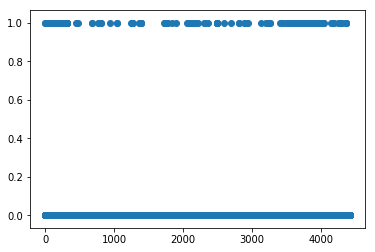

In [122]:
plt.scatter(ind_data['recency'],new_dep_data['EXRELDATEN'])

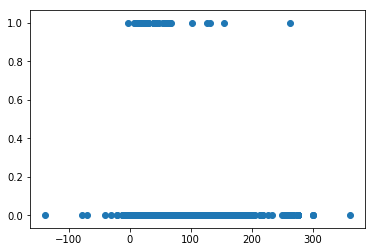

In [123]:
plt.scatter(ind_data['avg'],new_dep_data['EXRELDATEN'])

#### Modelling Phase

In [124]:
X_train, X_test, y_train, y_test= train_test_split(ind_data,new_dep_data,test_size=0.2,random_state=0)

In [125]:
logreg = LogisticRegression()
logreg.fit( X_train,y_train) 

C:\Users\Mayur Maheshwari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
y_pred=logreg.predict(X_test)

In [127]:
len(y_pred)

2769

In [128]:
from sklearn import metrics

cm = metrics.confusion_matrix( y_test,
                            y_pred , [1,0] )
cm

array([[   0,   45],
       [   0, 2724]], dtype=int64)

Text(0.5,15,'Predicted label')

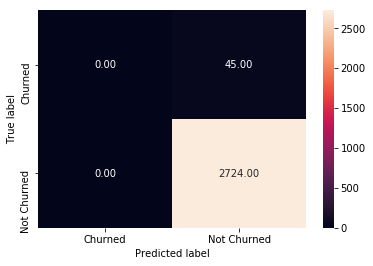

In [129]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Churned", "Not Churned"] , yticklabels = ["Churned", "Not Churned"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [130]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(random_state=0)
svm_clf.fit(X_train,y_train)


C:\Users\Mayur Maheshwari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [131]:
y_pred=svm_clf.predict(X_test)

In [132]:
len(y_pred)

2769

In [133]:
y_pred=pd.DataFrame(data=y_pred,index=X_test.index)

In [134]:
cm = metrics.confusion_matrix( y_test, y_pred , [1,0] )
cm

array([[   0,   45],
       [   1, 2723]], dtype=int64)

In [135]:
metrics.accuracy_score( y_test, y_pred )

0.983387504514265